In [1]:
import math
from IPython import display
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv', sep=',')
california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))
california_housing_df['median_house_value'] /= 1000.0
california_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4883,-118.10,34.05,26.0,1495.0,328.0,1296.0,304.0,2.9130,152.300
12777,-121.80,39.33,30.0,1019.0,192.0,501.0,185.0,2.5259,81.300
5265,-118.14,34.03,44.0,2003.0,390.0,1291.0,392.0,4.0625,201.100
14189,-122.08,38.30,2.0,6718.0,858.0,2012.0,654.0,6.8872,305.200
5292,-118.14,33.89,37.0,1159.0,238.0,740.0,243.0,4.9107,179.600
12562,-121.66,36.69,6.0,10613.0,2485.0,7249.0,2375.0,3.7912,168.900
16313,-122.50,37.76,52.0,2018.0,422.0,1142.0,463.0,3.7083,307.700
16197,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334.600
14729,-122.19,37.77,52.0,2170.0,428.0,1086.0,425.0,3.3715,143.900
15113,-122.26,38.00,14.0,2338.0,391.0,1003.0,398.0,4.2269,170.500


In [3]:
california_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [4]:
#Define the input features
my_feature = california_housing_df[["total_rooms"]]
#Configure a numeric feature columns for total_rooms
feature_columns = [tf.feature_column.numeric_column("total_rooms")]
my_feature

,total_rooms
4883,1495.0
12777,1019.0
5265,2003.0
14189,6718.0
5292,1159.0
12562,10613.0
16313,2018.0
16197,2297.0
14729,2170.0
15113,2338.0


In [5]:
feature_columns

[_NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [6]:
#Define Label
targets = california_housing_df['median_house_value']
targets

4883     152.300
12777     81.300
5265     201.100
14189    305.200
5292     179.600
12562    168.900
16313    307.700
16197    334.600
14729    143.900
15113    170.500
14265    266.400
4242     268.100
7774     186.800
14896    216.700
4326     217.500
3332     262.500
244       66.000
15182    240.300
2098     243.700
8787     333.100
7647     285.700
2817     161.800
6744     145.200
11386    130.700
7032     396.400
13316    346.700
16776    364.800
10398    244.000
2391      75.000
7706     319.400
          ...   
12932     85.100
14902     92.800
6244     372.900
5549     156.000
2944     500.001
7469     200.000
13173    268.800
6524     138.100
136       84.700
6049     166.100
14749    500.001
5623     148.600
16967     85.100
16449    275.200
13572    314.900
9368     181.100
1888     175.600
12004    146.900
5760     162.100
2414     137.600
2417     122.800
343       98.600
2803     318.300
1148     168.800
14336    165.600
9917     357.500
15976    500.001
15209    153.6

Configure the Linear Regressor

In [7]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
#Gradient clipping ensure the magnitude of gradient not become too large during training which wil cause GD to fail
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

In [8]:
#Configure the linear regression model with the feature columns and optimizer
linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer=my_optimizer)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023442167748>, '_keep_checkpoint_max': 5, '_task_id': 0, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_session_config': None, '_tf_random_seed': None, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmppw8pk6ft', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_service': None, '_save_summary_steps': 100, '_task_type': 'worker', '_num_worker_replicas': 1, '_is_chief': True, '_master': ''}


Define the Input function

In [9]:
def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Convert pandas data into a dict of np array
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset, and configure batching and repeating
    ds = Dataset.from_tensor_slices(tensors=(features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle the data if specified
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

Train the model

In [10]:
_ = linear_regressor.train(input_fn=lambda: my_input_function(my_feature, targets),
                           steps=100)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmppw8pk6ft\model.ckpt.
INFO:tensorflow:loss = 27093.162, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\STRIKE~1\AppData\Local\Temp\tmppw8pk6ft\model.ckpt.
INFO:tensorflow:Loss for final step: 249821.69.


Evaluate the model

In [13]:
#Create an input function for predictions
prediction_input_function = lambda: my_input_function(my_feature, targets, num_epochs=1, shuffle=False)

#Call predict() on the linear_regressor to make prediction
predictions = linear_regressor.predict(input_fn=prediction_input_function)

#Format predictions as numpy array, so can calculate error metrics
predictions = np.array([item['predictions'][0] for item in predictions])

#Print mean suqared error and root mean squared error
mean_squared_error = metrics.mean_squared_error(y_pred=predictions, y_true=targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print('Mean Squared Error (training data): %0.3f' % mean_squared_error)
print('Root Mean Squared Error (training data): %0.3f' % root_mean_squared_error)

INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmppw8pk6ft\model.ckpt-100
Mean Squared Error (training data): 56367.025
Root Mean Squared Error (training data): 237.417


In [14]:
#Compare RMSE to the difference of min and max of our targets
min_house_value = california_housing_df['median_house_value'].min()
max_house_value = california_housing_df['median_house_value'].max()
min_max_difference = max_house_value - min_house_value
print('Min. median house value: %0.3f' % min_house_value)
print('Max. median house value: %0.3f' % max_house_value)
print('Difference between Min. and Max.: %0.3f' % min_max_difference)
print('RMSE: %0.3f' % root_mean_squared_error)

Min. median house value: 14.999
Max. median house value: 500.001
Difference between Min. and Max.: 485.002
RMSE: 237.417


In [16]:
#How weel our predictions match our targets, summary statistics
calibration_data = pd.DataFrame()
calibration_data['predictions'] = pd.Series(predictions)
calibration_data['targets'] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.000000,17000.000000
mean,0.132184,207.300912
std,0.108997,115.983764
min,0.000100,14.999000
25%,0.073100,119.400000
50%,0.106350,180.400000
75%,0.157563,265.000000
max,1.896850,500.001000


Visualize Data have learned

[5.e-05] [2.8840798e-08]


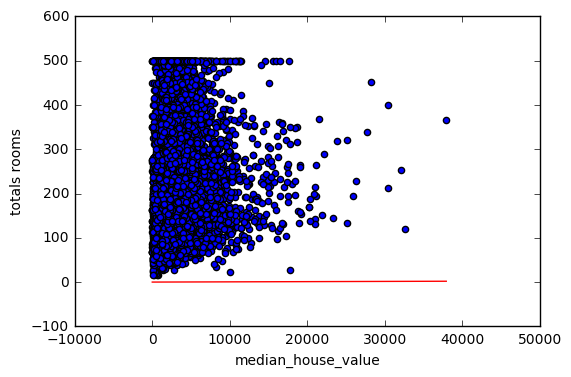

In [21]:
#Get the min and max total_rooms value
x_0 = california_housing_df['total_rooms'].min()
x_1 = california_housing_df['total_rooms'].max()

#Retrieve the final weight and bias generated during training
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
print(weight, bias)

#Get the predicted median_house_values for the min and max total_rooms values
y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

#Plot our regression line from x_0, y_0 to x_1, y_1
plt.plot([x_0, x_1], [y_0, y_1], c='r')

#graph axes
plt.xlabel('median_house_value')
plt.ylabel('totals rooms')

#Plot a scatter plot from our data 
plt.scatter(california_housing_df['total_rooms'], california_housing_df['median_house_value'])

#Display graph
plt.show()

Tweak the Model Hyperparams

In [28]:
def train_model(learning_rate, steps, batch_size, input_feature='total_rooms'):
    #train a linear regression model for one feature
    
    periods = 10
    steps_per_period = steps/periods
    
    my_feature = input_feature
    my_feature_data = california_housing_df[ [my_feature] ]
    my_label = 'median_house_value'
    targets = california_housing_df[my_label]
    
    #create feature colums
    feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
    #create input functions
    training_input_function = lambda: my_input_function(my_feature_data, targets, batch_size=batch_size)
    prediction_input_function = lambda: my_input_function(my_feature_data, targets, num_epochs=1, shuffle=False)
    
    #Create a linear regressor object
    my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer=my_optimizer)
    
    #Setup to plot the state of our model's line each period
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title('Learned Line by Period')
    plt.xlabel(my_feature)
    plt.ylabel(my_label)
    plt.scatter(california_housing_df[my_feature], california_housing_df[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1,1,periods)]
    
    
    
    #Train the model, but do so inside a loop so that we can periodically assess loss metrics
    print('Training model...')
    print('RMSE (training data): ')
    root_mean_squared_errors = []
    for period in range(0, periods):
        #Train the model, starting from the prior state
        linear_regressor.train(input_fn=training_input_function, steps=steps_per_period)
        
        #Compute predictions
        predictions = linear_regressor.predict(input_fn=prediction_input_function)
        predictions = np.array([item['predictions'][0] for item in predictions])
        
        #Compute loss
        root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
        #Print the current loss
        print(' period %02d: %0.2f' % (period, root_mean_squared_error))
        #Add the loss metrics from this period to our root_mean_squared_errors list
        root_mean_squared_errors.append(root_mean_squared_error)
        
        #Track the weights and biases over time
        #Apply some math to ensure that the data and line are plotted neatly
        y_extents = np.array([0, california_housing_df[my_label].max()])
        
        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
        
        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents, california_housing_df[my_feature].max()), california_housing_df[my_feature].min())
        y_extents = weight * x_extents + bias
        plt.plot(x_extents, y_extents, color=colors[period])
    print('Model training finished!!!')
    
    #Ouput a graph of loss metrics over periods
    plt.subplot(1,2,2)
    plt.xlabel('Periods')
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error vs Periods')
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)
    plt.show()
    
    #Output a table with calibration data
    calibration_data = pd.DataFrame()
    calibration_data['predictions'] = pd.Series(predictions)
    calibration_data['targets'] = pd.Series(targets)
    display.display(calibration_data.describe())
    
    print('Final RMSE on training data: %0.2f' % root_mean_squared_error)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002368D1B4C88>, '_keep_checkpoint_max': 5, '_task_id': 0, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_session_config': None, '_tf_random_seed': None, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpi3cdu8a7', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_service': None, '_save_summary_steps': 100, '_task_type': 'worker', '_num_worker_replicas': 1, '_is_chief': True, '_master': ''}
Training model...
RMSE (training data): 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpi3cdu8a7\model.ckpt.
INFO:tensorflow:loss = 418003.94, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpi3cdu8a7\model.ckpt.
INFO:tensorflow:Loss for final step

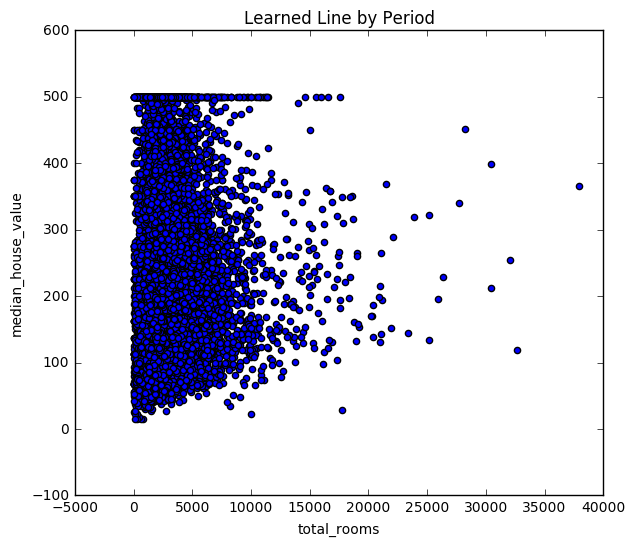

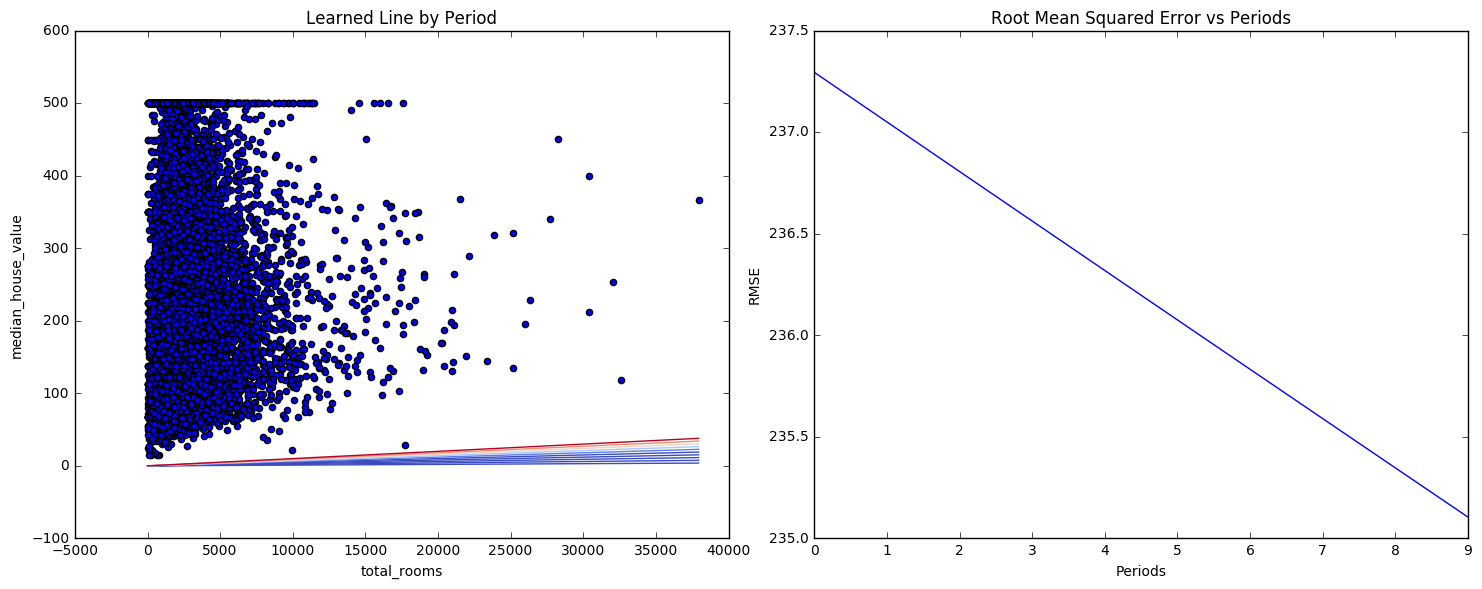

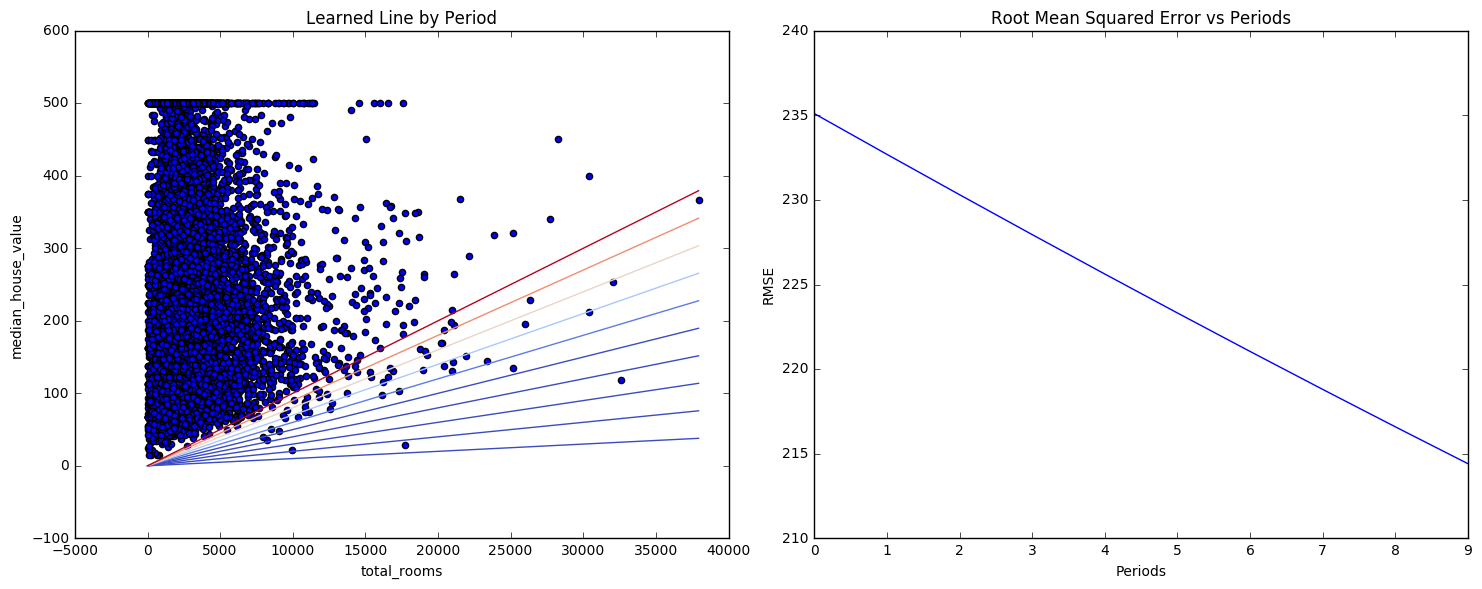

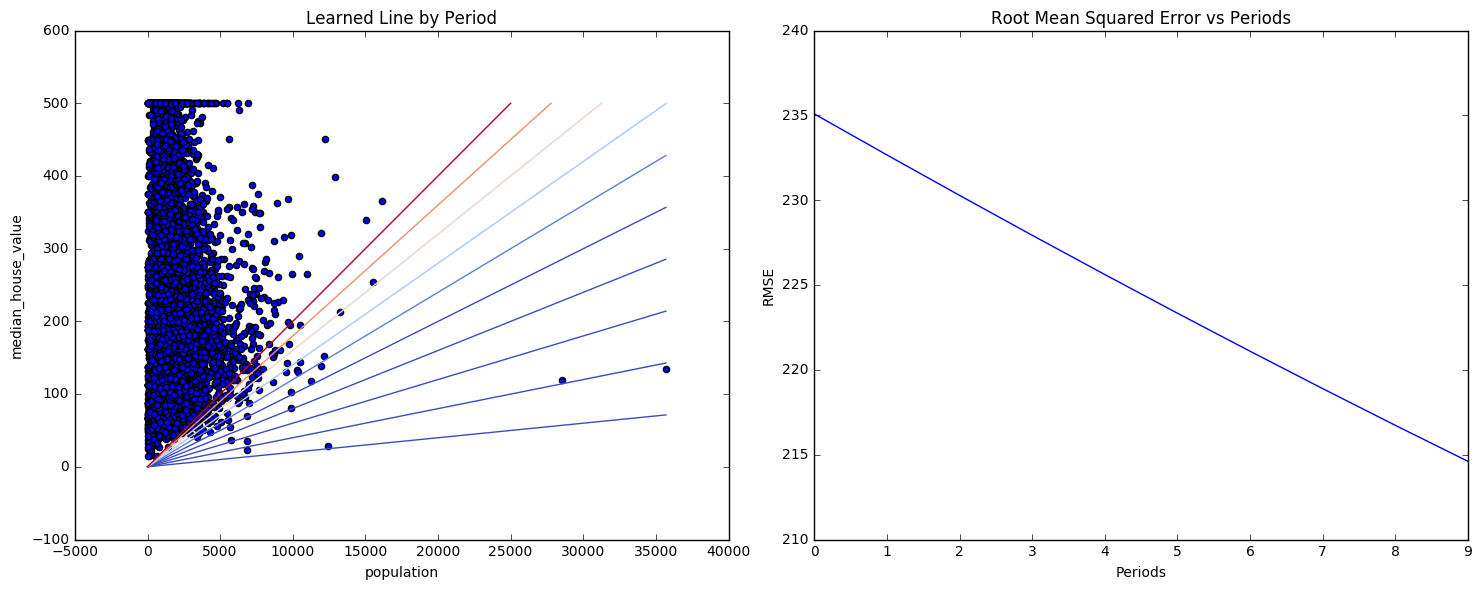

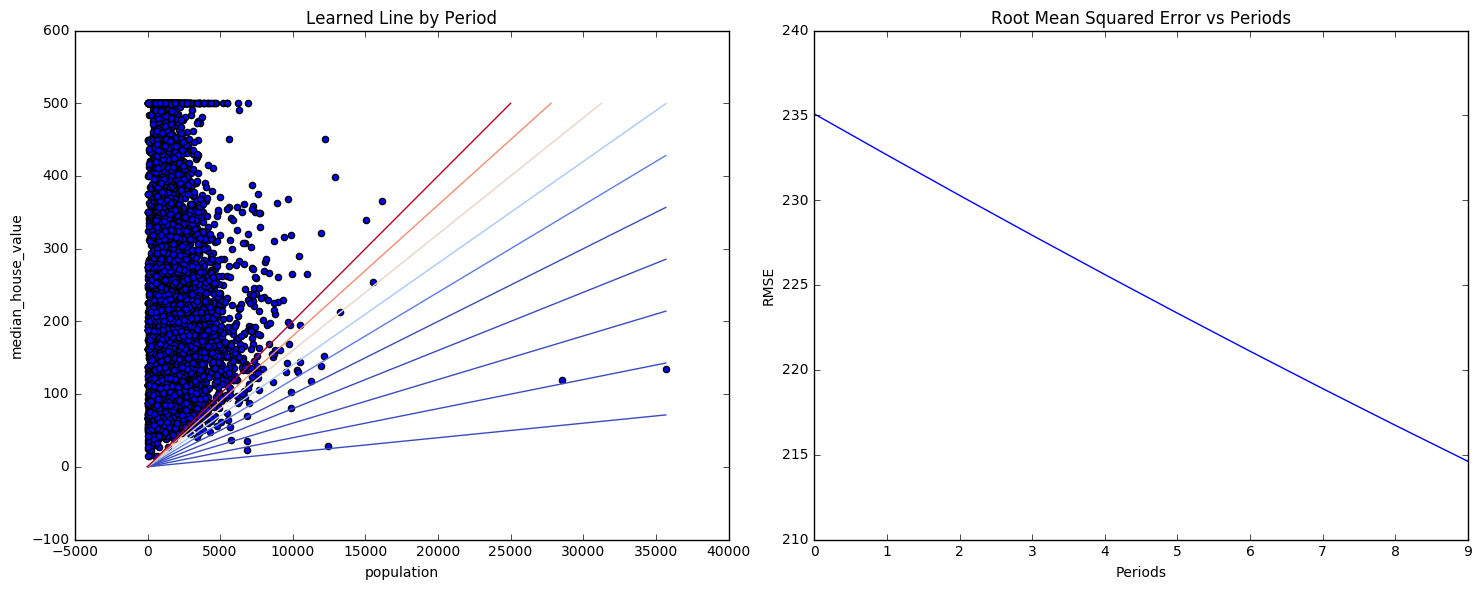

,predictions,targets
count,17000.000000,17000.000000
mean,28.610426,207.300912
std,22.956905,115.983764
min,0.079254,14.999000
25%,15.819186,119.400000
50%,23.359154,180.400000
75%,34.439106,265.000000
max,713.656128,500.001000


Final RMSE on training data: 214.61


In [29]:
train_model(learning_rate=0.00002, steps=1000, batch_size=5, input_feature='population')